In [30]:
# 라이브러리 import 

import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score,roc_auc_score, mean_squared_error, confusion_matrix

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

from imblearn.over_sampling import SMOTE

import warnings 
warnings.filterwarnings("ignore")

# 한글 깨짐 방지
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'


# 차트에 마이너스 출력
plt.rcParams['axes.unicode_minus'] = False

In [2]:
X_train = pd.read_csv('../datasets/X_train.csv')
X_test = pd.read_csv('../datasets/X_test.csv')
y_train = pd.read_csv('../datasets/Y_train.csv')
y_test = pd.read_csv('../datasets/Y_test.csv')

In [3]:
X_train_공통 = X_train[['부채비율', '자기자본순이익률', '재고자산회전률', '총자본회전률', 'RETA', 'EBTA', '금융비용부담률', '거래량회전율', '로그시가총액', '수정거래량']]
X_test_공통 = X_test[['부채비율', '자기자본순이익률', '재고자산회전률', '총자본회전률', 'RETA', 'EBTA', '금융비용부담률', '거래량회전율', '로그시가총액', '수정거래량']]

### 샘플링 X

In [16]:
scale_pos_weight = y_test.value_counts()[0] / y_test.value_counts()[1]

In [35]:
models = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
]


rdict={'model':[],'acc_train':[],'precision_train':[],'recall_train':[],'f1_score_train':[],'AUC_train':[],'acc':[],'precision':[],'recall':[],'f1_score':[],'AUC':[]}


for clf in models:
    clf = clf.fit(X_train_공통, y_train)
#1열:Train
    y_hat = clf.predict(X_train_공통)
    results_train  = (round(accuracy_score(y_train,y_hat),4),
                      round(precision_score(y_train,y_hat),4),
                      round(recall_score(y_train,y_hat),4),
                      round(f1_score(y_train,y_hat),4),
                      round(roc_auc_score(y_train,y_hat),4))
#2열:Test
    y_hat = clf.predict(X_test_공통)
    results = (round(accuracy_score(y_test,y_hat),4),
                    round(precision_score(y_test,y_hat),4),
                    round(recall_score(y_test,y_hat),4),
                    round(f1_score(y_test,y_hat),4),
                    round(roc_auc_score(y_test,y_hat),4))

    rdict['model'].append(clf); 
    rdict['acc_train'].append(results_train[0])
    rdict['precision_train'].append(results_train[1])
    rdict['recall_train'].append(results_train[2])
    rdict['f1_score_train'].append(results_train[3])
    rdict['AUC_train'].append(results_train[4])
    
    rdict['acc'].append(results[0])
    rdict['precision'].append(results[1])
    rdict['recall'].append(results[2])
    rdict['f1_score'].append(results[3])
    rdict['AUC'].append(results[4])

    print(results_train, results)

rdf3 = pd.DataFrame(data=rdict)
rdf3

(0.9629, 0.6222, 0.1924, 0.294, 0.5938) (0.9688, 0.3684, 0.0959, 0.1522, 0.5455)
(0.9719, 0.9579, 0.3127, 0.4715, 0.6561) (0.9716, 0.55, 0.1507, 0.2366, 0.5735)
(1.0, 1.0, 1.0, 1.0, 1.0) (0.9416, 0.2126, 0.3699, 0.27, 0.6643)
(1.0, 1.0, 1.0, 1.0, 1.0) (0.9676, 0.3824, 0.1781, 0.243, 0.5847)
(1.0, 1.0, 1.0, 1.0, 1.0) (0.9704, 0.4839, 0.2055, 0.2885, 0.5994)


,model,acc_train,precision_train,recall_train,f1_score_train,AUC_train,acc,precision,recall,f1_score,AUC
0,LogisticRegression(),0.9629,0.6222,0.1924,0.2940,0.5938,0.9688,0.3684,0.0959,0.1522,0.5455
1,SVC(),0.9719,0.9579,0.3127,0.4715,0.6561,0.9716,0.5500,0.1507,0.2366,0.5735
2,DecisionTreeClassifier(),1.0000,1.0000,1.0000,1.0000,1.0000,0.9416,0.2126,0.3699,0.2700,0.6643
3,"(DecisionTreeClassifier(max_features='sqrt', r...",1.0000,1.0000,1.0000,1.0000,1.0000,0.9676,0.3824,0.1781,0.2430,0.5847
4,"XGBClassifier(base_score=None, booster=None, c...",1.0000,1.0000,1.0000,1.0000,1.0000,0.9704,0.4839,0.2055,0.2885,0.5994


### 오버샘플링 (1:1)

In [4]:
# 오버샘플링 (1:1)
from imblearn.over_sampling import SMOTE
rus = SMOTE(sampling_strategy=1)
X_train_1, y_train_1 = rus.fit_resample(X_train_공통, y_train)

In [6]:
models = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
]


rdict={'model':[],'acc_train':[],'precision_train':[],'recall_train':[],'f1_score_train':[],'AUC_train':[],'acc':[],'precision':[],'recall':[],'f1_score':[],'AUC':[]}


for clf in models:
    clf = clf.fit(X_train_1, y_train_1)
#1열:Train
    y_hat = clf.predict(X_train_1)
    results_train  = (round(accuracy_score(y_train_1,y_hat),4),
                      round(precision_score(y_train_1,y_hat),4),
                      round(recall_score(y_train_1,y_hat),4),
                      round(f1_score(y_train_1,y_hat),4),
                      round(roc_auc_score(y_train_1,y_hat),4))
#2열:Test
    y_hat = clf.predict(X_test_공통)
    results = (round(accuracy_score(y_test,y_hat),4),
                    round(precision_score(y_test,y_hat),4),
                    round(recall_score(y_test,y_hat),4),
                    round(f1_score(y_test,y_hat),4),
                    round(roc_auc_score(y_test,y_hat),4))

    rdict['model'].append(clf); 
    rdict['acc_train'].append(results_train[0])
    rdict['precision_train'].append(results_train[1])
    rdict['recall_train'].append(results_train[2])
    rdict['f1_score_train'].append(results_train[3])
    rdict['AUC_train'].append(results_train[4])
    
    rdict['acc'].append(results[0])
    rdict['precision'].append(results[1])
    rdict['recall'].append(results[2])
    rdict['f1_score'].append(results[3])
    rdict['AUC'].append(results[4])

    print(results_train, results)

rdf3 = pd.DataFrame(data=rdict)
rdf3

(0.8065, 0.849, 0.7457, 0.794, 0.8065) (0.8401, 0.1241, 0.7397, 0.2126, 0.7914)
(0.8538, 0.8933, 0.8037, 0.8461, 0.8538) (0.8681, 0.1275, 0.6027, 0.2105, 0.7394)
(1.0, 1.0, 1.0, 1.0, 1.0) (0.8693, 0.1056, 0.4658, 0.1722, 0.6736)
(1.0, 1.0, 1.0, 1.0, 1.0) (0.9285, 0.224, 0.589, 0.3245, 0.7638)
(0.9978, 0.9966, 0.9991, 0.9978, 0.9978) (0.9257, 0.1946, 0.4932, 0.2791, 0.7159)


,model,acc_train,precision_train,recall_train,f1_score_train,AUC_train,acc,precision,recall,f1_score,AUC
0,LogisticRegression(),0.8065,0.8490,0.7457,0.7940,0.8065,0.8401,0.1241,0.7397,0.2126,0.7914
1,SVC(),0.8538,0.8933,0.8037,0.8461,0.8538,0.8681,0.1275,0.6027,0.2105,0.7394
2,DecisionTreeClassifier(),1.0000,1.0000,1.0000,1.0000,1.0000,0.8693,0.1056,0.4658,0.1722,0.6736
3,"(DecisionTreeClassifier(max_features='sqrt', r...",1.0000,1.0000,1.0000,1.0000,1.0000,0.9285,0.2240,0.5890,0.3245,0.7638
4,"XGBClassifier(base_score=None, booster=None, c...",0.9978,0.9966,0.9991,0.9978,0.9978,0.9257,0.1946,0.4932,0.2791,0.7159


### 오버샘플링 (2:1)

In [8]:
# 오버샘플링 (2:1)
from imblearn.over_sampling import SMOTE
rus = SMOTE(sampling_strategy=0.5)
X_train_2, y_train_2 = rus.fit_resample(X_train_공통, y_train)

In [9]:
models = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
]


rdict={'model':[],'acc_train':[],'precision_train':[],'recall_train':[],'f1_score_train':[],'AUC_train':[],'acc':[],'precision':[],'recall':[],'f1_score':[],'AUC':[]}


for clf in models:
    clf = clf.fit(X_train_2, y_train_2)
#1열:Train
    y_hat = clf.predict(X_train_2)
    results_train  = (round(accuracy_score(y_train_2,y_hat),4),
                      round(precision_score(y_train_2,y_hat),4),
                      round(recall_score(y_train_2,y_hat),4),
                      round(f1_score(y_train_2,y_hat),4),
                      round(roc_auc_score(y_train_2,y_hat),4))
#2열:Test
    y_hat = clf.predict(X_test_공통)
    results = (round(accuracy_score(y_test,y_hat),4),
                    round(precision_score(y_test,y_hat),4),
                    round(recall_score(y_test,y_hat),4),
                    round(f1_score(y_test,y_hat),4),
                    round(roc_auc_score(y_test,y_hat),4))

    rdict['model'].append(clf); 
    rdict['acc_train'].append(results_train[0])
    rdict['precision_train'].append(results_train[1])
    rdict['recall_train'].append(results_train[2])
    rdict['f1_score_train'].append(results_train[3])
    rdict['AUC_train'].append(results_train[4])
    
    rdict['acc'].append(results[0])
    rdict['precision'].append(results[1])
    rdict['recall'].append(results[2])
    rdict['f1_score'].append(results[3])
    rdict['AUC'].append(results[4])

    print(results_train, results)

rdf3 = pd.DataFrame(data=rdict)
rdf3

(0.8237, 0.8186, 0.6051, 0.6958, 0.769) (0.9081, 0.1873, 0.6438, 0.2901, 0.7799)
(0.8625, 0.8809, 0.6795, 0.7672, 0.8168) (0.9241, 0.1872, 0.4795, 0.2692, 0.7084)
(1.0, 1.0, 1.0, 1.0, 1.0) (0.8961, 0.1152, 0.3836, 0.1772, 0.6475)
(1.0, 1.0, 1.0, 1.0, 1.0) (0.95, 0.2903, 0.4932, 0.3655, 0.7285)
(0.9996, 0.9989, 1.0, 0.9994, 0.9997) (0.9384, 0.2086, 0.3973, 0.2736, 0.676)


,model,acc_train,precision_train,recall_train,f1_score_train,AUC_train,acc,precision,recall,f1_score,AUC
0,LogisticRegression(),0.8237,0.8186,0.6051,0.6958,0.7690,0.9081,0.1873,0.6438,0.2901,0.7799
1,SVC(),0.8625,0.8809,0.6795,0.7672,0.8168,0.9241,0.1872,0.4795,0.2692,0.7084
2,DecisionTreeClassifier(),1.0000,1.0000,1.0000,1.0000,1.0000,0.8961,0.1152,0.3836,0.1772,0.6475
3,"(DecisionTreeClassifier(max_features='sqrt', r...",1.0000,1.0000,1.0000,1.0000,1.0000,0.9500,0.2903,0.4932,0.3655,0.7285
4,"XGBClassifier(base_score=None, booster=None, c...",0.9996,0.9989,1.0000,0.9994,0.9997,0.9384,0.2086,0.3973,0.2736,0.6760


### 오버샘플링 (4:1)

In [10]:
# 오버샘플링 (4:1)
from imblearn.over_sampling import SMOTE
rus = SMOTE(sampling_strategy=0.25)
X_train_4, y_train_4 = rus.fit_resample(X_train_공통, y_train)

In [13]:
models = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
]


rdict={'model':[],'acc_train':[],'precision_train':[],'recall_train':[],'f1_score_train':[],'AUC_train':[],'acc':[],'precision':[],'recall':[],'f1_score':[],'AUC':[]}


for clf in models:
    clf = clf.fit(X_train_4, y_train_4)
#1열:Train
    y_hat = clf.predict(X_train_4)
    results_train  = (round(accuracy_score(y_train_4,y_hat),4),
                      round(precision_score(y_train_4,y_hat),4),
                      round(recall_score(y_train_4,y_hat),4),
                      round(f1_score(y_train_4,y_hat),4),
                      round(roc_auc_score(y_train_4,y_hat),4))
#2열:Test
    y_hat = clf.predict(X_test_공통)
    results = (round(accuracy_score(y_test,y_hat),4),
                    round(precision_score(y_test,y_hat),4),
                    round(recall_score(y_test,y_hat),4),
                    round(f1_score(y_test,y_hat),4),
                    round(roc_auc_score(y_test,y_hat),4))

    rdict['model'].append(clf); 
    rdict['acc_train'].append(results_train[0])
    rdict['precision_train'].append(results_train[1])
    rdict['recall_train'].append(results_train[2])
    rdict['f1_score_train'].append(results_train[3])
    rdict['AUC_train'].append(results_train[4])
    
    rdict['acc'].append(results[0])
    rdict['precision'].append(results[1])
    rdict['recall'].append(results[2])
    rdict['f1_score'].append(results[3])
    rdict['AUC'].append(results[4])

    print(results_train, results)

rdf3 = pd.DataFrame(data=rdict)
rdf3

(0.8753, 0.7911, 0.5112, 0.6211, 0.7387) (0.9452, 0.2681, 0.5068, 0.3507, 0.7326)
(0.9068, 0.8799, 0.6186, 0.7265, 0.7988) (0.9448, 0.2222, 0.3562, 0.2737, 0.6594)
(1.0, 1.0, 1.0, 1.0, 1.0) (0.9133, 0.0955, 0.2329, 0.1355, 0.5833)
(1.0, 1.0, 1.0, 1.0, 1.0) (0.9576, 0.2911, 0.3151, 0.3026, 0.646)
(0.9997, 0.9994, 0.9989, 0.9991, 0.9994) (0.9516, 0.25, 0.3288, 0.284, 0.6496)


,model,acc_train,precision_train,recall_train,f1_score_train,AUC_train,acc,precision,recall,f1_score,AUC
0,LogisticRegression(),0.8753,0.7911,0.5112,0.6211,0.7387,0.9452,0.2681,0.5068,0.3507,0.7326
1,SVC(),0.9068,0.8799,0.6186,0.7265,0.7988,0.9448,0.2222,0.3562,0.2737,0.6594
2,DecisionTreeClassifier(),1.0000,1.0000,1.0000,1.0000,1.0000,0.9133,0.0955,0.2329,0.1355,0.5833
3,"(DecisionTreeClassifier(max_features='sqrt', r...",1.0000,1.0000,1.0000,1.0000,1.0000,0.9576,0.2911,0.3151,0.3026,0.6460
4,"XGBClassifier(base_score=None, booster=None, c...",0.9997,0.9994,0.9989,0.9991,0.9994,0.9516,0.2500,0.3288,0.2840,0.6496


### 오버샘플링 (10:1)

In [12]:
# 오버샘플링 (10:1)
from imblearn.over_sampling import SMOTE
rus = SMOTE(sampling_strategy=0.1)
X_train_10, y_train_10 = rus.fit_resample(X_train_공통, y_train)

In [14]:
models = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
]


rdict={'model':[],'acc_train':[],'precision_train':[],'recall_train':[],'f1_score_train':[],'AUC_train':[],'acc':[],'precision':[],'recall':[],'f1_score':[],'AUC':[]}


for clf in models:
    clf = clf.fit(X_train_10, y_train_10)
#1열:Train
    y_hat = clf.predict(X_train_10)
    results_train  = (round(accuracy_score(y_train_10,y_hat),4),
                      round(precision_score(y_train_10,y_hat),4),
                      round(recall_score(y_train_10,y_hat),4),
                      round(f1_score(y_train_10,y_hat),4),
                      round(roc_auc_score(y_train_10,y_hat),4))
#2열:Test
    y_hat = clf.predict(X_test_공통)
    results = (round(accuracy_score(y_test,y_hat),4),
                    round(precision_score(y_test,y_hat),4),
                    round(recall_score(y_test,y_hat),4),
                    round(f1_score(y_test,y_hat),4),
                    round(roc_auc_score(y_test,y_hat),4))

    rdict['model'].append(clf); 
    rdict['acc_train'].append(results_train[0])
    rdict['precision_train'].append(results_train[1])
    rdict['recall_train'].append(results_train[2])
    rdict['f1_score_train'].append(results_train[3])
    rdict['AUC_train'].append(results_train[4])
    
    rdict['acc'].append(results[0])
    rdict['precision'].append(results[1])
    rdict['recall'].append(results[2])
    rdict['f1_score'].append(results[3])
    rdict['AUC'].append(results[4])

    print(results_train, results)

rdf3 = pd.DataFrame(data=rdict)
rdf3

(0.9272, 0.7363, 0.3089, 0.4352, 0.6489) (0.9672, 0.4151, 0.3014, 0.3492, 0.6443)
(0.9458, 0.8767, 0.4698, 0.6118, 0.7316) (0.9644, 0.3462, 0.2466, 0.288, 0.6163)
(1.0, 1.0, 1.0, 1.0, 1.0) (0.9233, 0.1749, 0.4384, 0.25, 0.6881)
(1.0, 1.0, 1.0, 1.0, 1.0) (0.962, 0.2963, 0.2192, 0.252, 0.6018)
(1.0, 1.0, 1.0, 1.0, 1.0) (0.9608, 0.3016, 0.2603, 0.2794, 0.6211)


,model,acc_train,precision_train,recall_train,f1_score_train,AUC_train,acc,precision,recall,f1_score,AUC
0,LogisticRegression(),0.9272,0.7363,0.3089,0.4352,0.6489,0.9672,0.4151,0.3014,0.3492,0.6443
1,SVC(),0.9458,0.8767,0.4698,0.6118,0.7316,0.9644,0.3462,0.2466,0.2880,0.6163
2,DecisionTreeClassifier(),1.0000,1.0000,1.0000,1.0000,1.0000,0.9233,0.1749,0.4384,0.2500,0.6881
3,"(DecisionTreeClassifier(max_features='sqrt', r...",1.0000,1.0000,1.0000,1.0000,1.0000,0.9620,0.2963,0.2192,0.2520,0.6018
4,"XGBClassifier(base_score=None, booster=None, c...",1.0000,1.0000,1.0000,1.0000,1.0000,0.9608,0.3016,0.2603,0.2794,0.6211


### 오버샘플링(1:1) 후 하이퍼파라미터

In [24]:
models = [
    LogisticRegression(penalty='l1', solver='liblinear', C=0.000695, max_iter=200, class_weight='balanced'),
    SVC(kernel='rbf', gamma=1, C=0.1, class_weight='balanced'),
    DecisionTreeClassifier(criterion='log_loss', max_depth=30, max_features=0.1, class_weight='balanced'),
    RandomForestClassifier(n_estimators = 80, criterion = 'gini', max_depth = 5, max_features = 'sqrt', min_samples_split = 5),
    XGBClassifier(learning_rate=0.05, n_estimators=300, scale_pos_weight=scale_pos_weight, min_child_weight=4, subsample=0.5, colsample_bytree=0.6, max_depth=7, gamma=1, reg_alpha=0.8, reg_lambda=0),
]


rdict={'model':[],'acc_train':[],'precision_train':[],'recall_train':[],'f1_score_train':[],'AUC_train':[],'acc':[],'precision':[],'recall':[],'f1_score':[],'AUC':[]}


for clf in models:
    clf = clf.fit(X_train_1, y_train_1)
#1열:Train
    y_hat = clf.predict(X_train_1)
    results_train  = (round(accuracy_score(y_train_1,y_hat),4),
                      round(precision_score(y_train_1,y_hat),4),
                      round(recall_score(y_train_1,y_hat),4),
                      round(f1_score(y_train_1,y_hat),4),
                      round(roc_auc_score(y_train_1,y_hat),4))
#2열:Test
    y_hat = clf.predict(X_test_공통)
    results = (round(accuracy_score(y_test,y_hat),4),
                    round(precision_score(y_test,y_hat),4),
                    round(recall_score(y_test,y_hat),4),
                    round(f1_score(y_test,y_hat),4),
                    round(roc_auc_score(y_test,y_hat),4))

    rdict['model'].append(clf); 
    rdict['acc_train'].append(results_train[0])
    rdict['precision_train'].append(results_train[1])
    rdict['recall_train'].append(results_train[2])
    rdict['f1_score_train'].append(results_train[3])
    rdict['AUC_train'].append(results_train[4])
    
    rdict['acc'].append(results[0])
    rdict['precision'].append(results[1])
    rdict['recall'].append(results[2])
    rdict['f1_score'].append(results[3])
    rdict['AUC'].append(results[4])

    print(results_train, results)

rdf3 = pd.DataFrame(data=rdict)
rdf3

(0.7641, 0.7247, 0.8517, 0.7831, 0.7641) (0.6283, 0.065, 0.8767, 0.121, 0.7488)
(0.8915, 0.8381, 0.9704, 0.8994, 0.8915) (0.7466, 0.0869, 0.8082, 0.1569, 0.7765)
(1.0, 1.0, 1.0, 1.0, 1.0) (0.8793, 0.1365, 0.589, 0.2216, 0.7385)
(0.8495, 0.8821, 0.8069, 0.8428, 0.8495) (0.8437, 0.1285, 0.7534, 0.2196, 0.7999)
(0.9413, 0.895, 1.0, 0.9446, 0.9413) (0.809, 0.1083, 0.7671, 0.1898, 0.7887)


,model,acc_train,precision_train,recall_train,f1_score_train,AUC_train,acc,precision,recall,f1_score,AUC
0,"LogisticRegression(C=0.000695, class_weight='b...",0.7641,0.7247,0.8517,0.7831,0.7641,0.6283,0.0650,0.8767,0.1210,0.7488
1,"SVC(C=0.1, class_weight='balanced', gamma=1)",0.8915,0.8381,0.9704,0.8994,0.8915,0.7466,0.0869,0.8082,0.1569,0.7765
2,DecisionTreeClassifier(class_weight='balanced'...,1.0000,1.0000,1.0000,1.0000,1.0000,0.8793,0.1365,0.5890,0.2216,0.7385
3,"(DecisionTreeClassifier(max_depth=5, max_featu...",0.8495,0.8821,0.8069,0.8428,0.8495,0.8437,0.1285,0.7534,0.2196,0.7999
4,"XGBClassifier(base_score=None, booster=None, c...",0.9413,0.8950,1.0000,0.9446,0.9413,0.8090,0.1083,0.7671,0.1898,0.7887


### Shapley value

In [28]:
import shap

model = XGBClassifier(learning_rate=0.05, n_estimators=300, scale_pos_weight=scale_pos_weight, min_child_weight=4, subsample=0.5, colsample_bytree=0.6, max_depth=7, gamma=1, reg_alpha=0.8, reg_lambda=0)
model.fit(X_train_1, y_train_1)

shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train_1)
shap.force_plot(explainer.expected_value, shap_values[0, :], X_train_1.iloc[0, :])

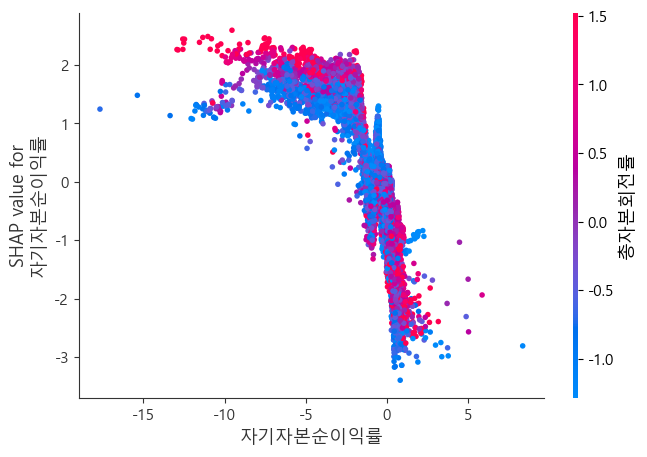

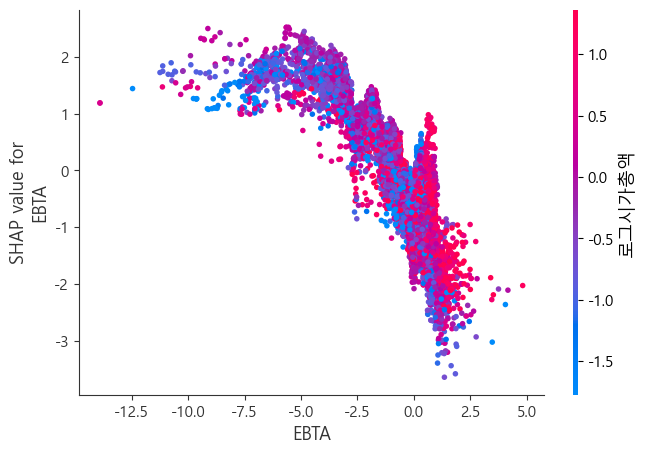

In [31]:
shap.initjs()
# 총 13개 특성의 Shapley value를 절댓값 변환 후 각 특성마다 더함 -> np.argsort()는 작은 순서대로 정렬, 큰 순서대로 정렬하려면
# 앞에 마이너스(-) 기호를 붙임
top_inds = np.argsort(-np.sum(np.abs(shap_values), 0))

# 영향력 top 2 컬럼
for i in range(2):
    shap.dependence_plot(top_inds[i], shap_values, X_train_1)

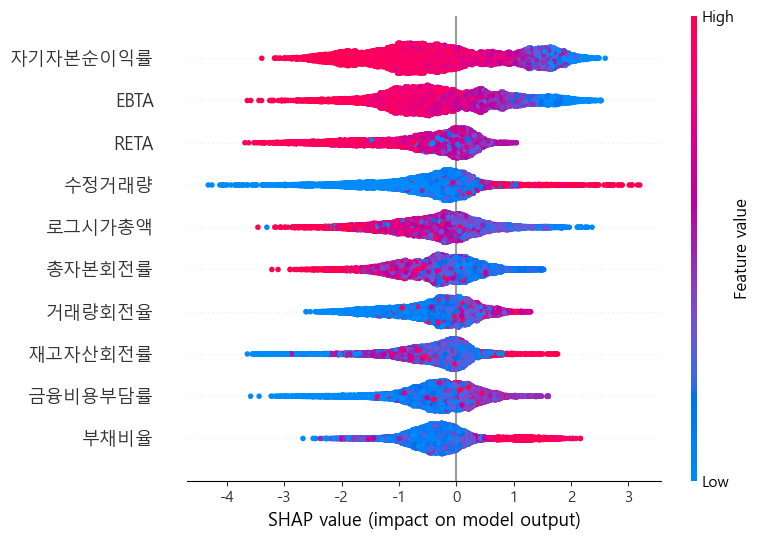

In [32]:
shap.summary_plot(shap_values, X_train_1)

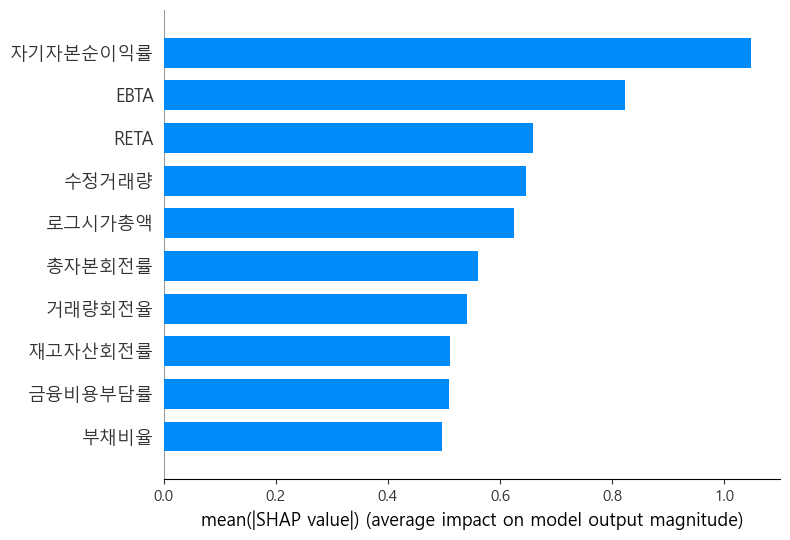

In [33]:
shap.summary_plot(shap_values, X_train_1, plot_type='bar')